<img align="center" src="https://cs5.pikabu.ru/post_img/2014/09/21/1/1411252786_329748226.jpg" width="300"> 


# Андан на экономе

## Семинар 3: работаем с табличками (Exploratory Data Analysisб EDA)

На этом семинаре мы поговорим про работу с таблицами, визуализацию и музыку (мб плохую)

In [1]:
import numpy as np         # библиотека для матриц и математики
import pandas as pd        # библиотека для работы с табличками
from scipy import stats    # модуль для работы со статистикой

# библиотеки для визуализации
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# зададим параметры рисуемых нами графиков, например, размер
plt.rcParams['figure.figsize'] = (10, 5)

Данные удобно представимы в виде таблиц. Обычно по строкам таких таблиц находятся наблюдения (`observations`), а по столбцам - признаки (`variables`).  

<img src="https://raw.githubusercontent.com/MidiukinM/Python/main/images/table.png" width="400">

Не перестанем повторять, что все в _python_ является объектом. Для таких табличек тоже есть свой тип объекта - `DataFrame` из пакета pandas.  

`DataFrame` содержит в себе еще несколько объектов: объекты `Index` и `Series`
* `Index` - это то, каким образом пронумерованы ваши строки. Обычно индексом являются числа от 0 до кол-ва строк, но могут быть и что-то другое, например, на картинке выше индексом выступают модели автомобилей
* `Series` - это объект для отдельной колонки датафрейма

In [3]:
# Выбираем имя для ребёнка
dct = {
    'name': ['Рагнеда', 'Засипотор', 'Януарий', 'Целомудр', 'Патоний', 'Раболептина', 'Свободолюбава', 'Карпеция'],
    'score': [6, 2, 1, 4, 6, 0, 8, 5]
}

df = pd.DataFrame(dct)
df.head()

,name,score
0,Рагнеда,6
1,Засипотор,2
2,Януарий,1
3,Целомудр,4
4,Патоний,6


In [4]:
type(df)

pandas.core.frame.DataFrame

Можно распаковать табличку на составляющие: 

- имена колонок
- индексы строк 
- матрица из данных

In [5]:
df.columns

Index(['name', 'score'], dtype='object')

In [6]:
df.columns.values

array(['name', 'score'], dtype=object)

In [7]:
df.index

RangeIndex(start=0, stop=8, step=1)

In [8]:
df.index.values

array([0, 1, 2, 3, 4, 5, 6, 7])

In [9]:
df.values

array([['Рагнеда', 6],
       ['Засипотор', 2],
       ['Януарий', 1],
       ['Целомудр', 4],
       ['Патоний', 6],
       ['Раболептина', 0],
       ['Свободолюбава', 8],
       ['Карпеция', 5]], dtype=object)

Все три объекта — это вектора и матрицы из `numpy`.

## 1. Смотрим на данные 

Давайте проанализируем данные про музыку.

In [10]:
# !wget https://raw.githubusercontent.com/FUlyankin/matstat-AB/main/week01_intro/data/youtube_data_short.csv

Давайте подгрузим данные и посмотрим что лежит внутри нашей таблички. Делать это будем командой [pd.read_csv().](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_csv.html#pandas.read_csv)

Аргументов у нее очень много, критически важные:

 - **filepath_or_buffer** — текстовая строка с названием (адресом) файла
 - **sep** — разделитель между данными
 - **header** — номер строки, в которой в файле указаны названия столбцов, None, если нет
 - **names** — список с названиями колонок
 - **index_col** — или номер столбца, или список,  или ничего - названия строк

In [11]:
# подгружаем данные
df = pd.read_csv("youtube_data_short.csv", sep = "\t")

# смотрим на первые 5 строк
df.head()

,title,commentCount,dislikeCount,likeCount,music_style,performer,viewCount,commentators_uniq,comments_obscene_cnt,video_age
0,"""#2Маши ""Свободные линии""",34.0,43.0,1402.0,popsa,2маши,214301.0,24.0,0.0,1141
1,"""ALARM"" СЕРГЕЙ ЛАЗАРЕВ ( SERGEY LAZAREV )",NaN,690.0,10532.0,popsa,лазарев,2221419.0,NaN,NaN,3217
2,"""EARTH SONG"" SERGEY LAZAREV. DEDICATED TO MIC...",26.0,10.0,269.0,popsa,лазарев,40327.0,23.0,0.0,3546
3,"""Earth song"" премия МУЗ-тВ 2010 (LIVE)",12.0,7.0,163.0,popsa,лазарев,11907.0,11.0,0.0,3189
4,"""FAKE"" СЕРГЕЙ ЛАЗАРЕВ (SERGEY)",46.0,19.0,597.0,popsa,лазарев,91483.0,33.0,1.0,3361


In [12]:
# смотрим на последние 5 строк
df.tail()

,title,commentCount,dislikeCount,likeCount,music_style,performer,viewCount,commentators_uniq,comments_obscene_cnt,video_age
19119,♫♪Мы расстаемся ♫♪ Бутырка new2019,2.0,0.0,11.0,shanson,бутырка,1107.0,NaN,NaN,44
19120,❤ 2 ЧАСА ❤ МОЦАРТ Для Младенцев - Колыбельная ...,94.0,431.0,1837.0,classic,classical_channel,391836.0,37.0,1.0,239
19121,モスクワライブショー ' 17,4872.0,15494.0,30603.0,rap,элджей,1187340.0,1788.0,352.0,339
19122,舞梅鬼 - 新年好宝贝 / Mumiy Troll - Happy New Year ...,59.0,10.0,260.0,rock,мумий_тролль,10147.0,19.0,0.0,997
19123,🎄#премьера песни!!! 2019г(вы не спешите говори...,1.0,0.0,22.0,shanson,бутырка,1566.0,NaN,NaN,65


In [13]:
# смотрим на размерность данных (кол-во строк, кол-во столбцов)
df.shape

(19124, 10)

In [14]:
# можно срезать по индексам конкретные строки
df[105:112]

,title,commentCount,dislikeCount,likeCount,music_style,performer,viewCount,commentators_uniq,comments_obscene_cnt,video_age
105,"""Первая четверть"" Юбилейный концерт в Олимпийс...",11.0,0.0,125.0,rock,арбенина,2225.0,NaN,NaN,8
106,"""Первая четверть"" юбилейный концерт Дианы Арбе...",43.0,3.0,399.0,rock,арбенина,3177.0,NaN,NaN,0
107,"""Перелётная птица"" [Москва, 2012г.]",2.0,3.0,56.0,shanson,ирина_круг,8325.0,2.0,0.0,1984
108,"""Пока ещё не поздно"". Михаил Круг. Жизнь и люб...",7.0,7.0,108.0,shanson,ирина_круг,29928.0,5.0,0.0,2148
109,"""Пока ещё не поздно"". Михаил Круг. Любовь и см...",15.0,11.0,158.0,shanson,ирина_круг,27185.0,9.0,0.0,2148
110,"""Последний герой"" с Дианой Арбениной - пре...",1.0,1.0,31.0,rock,арбенина,1953.0,1.0,0.0,892
111,"""Последний герой: Павел Кашин (тизер программы...",0.0,1.0,9.0,rock,арбенина,954.0,NaN,NaN,757


 __Описание колонок:__

- `title` — название видео
- `commentCount` — число комментариев
- `dislikeCount` — число дизлайков
- `likeCount`  — число лайков
- `music_style` — музыкальный стиль
- `performer` — исполнитель
- `viewCount` — число просмотров
- `commentators_uniq` — число уникальных комментаторов
- `comments_obscene_cnt` — число комментариев
- `video_age` — возраст видео в днях

Возраст видео посчитан в днях относительно `2019-03-15`

На основную информацию по колнкам можно посмотреть с помощью метода `.info()`. Напротив каждого названия столбца можно увидеть, сколько в нём заполненных ячеек. Например, у $18850$ клипов из $19124$ (общее число строк) есть информация о числе лайков, `likeCount`. Значит в $274$ строках пустоты, `NaN`.

In [15]:
# информация о нашей табличке
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19124 entries, 0 to 19123
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   title                 19124 non-null  object 
 1   commentCount          18914 non-null  float64
 2   dislikeCount          18850 non-null  float64
 3   likeCount             18850 non-null  float64
 4   music_style           19124 non-null  object 
 5   performer             19124 non-null  object 
 6   viewCount             19123 non-null  float64
 7   commentators_uniq     12314 non-null  float64
 8   comments_obscene_cnt  12314 non-null  float64
 9   video_age             19124 non-null  int64  
dtypes: float64(6), int64(1), object(3)
memory usage: 1.5+ MB


In [16]:
# только типы переменных
df.dtypes

title                    object
commentCount            float64
dislikeCount            float64
likeCount               float64
music_style              object
performer                object
viewCount               float64
commentators_uniq       float64
comments_obscene_cnt    float64
video_age                 int64
dtype: object

__Классификация переменных по типу данных:__  

* `int` — числовой, целые числа (1000, 0, -1)
* `float` — числовой, вещественные числа (1.0, 2.564523)
* `object` — строковый (бутырка, rock, f12aaz//)
* `bool` — булевский (True, False)
* `datetime` — дата (2020-01-12, 23.Jan.20)


__Классификация переменных по смыслу:__  

* `Непрерывные` — содержат непрерывное множество значений на каком-то промежутке (з/п, рост человека, вес буханки хлеба и тд)
* `Категориальные` — содержат конечное небольшое множество значений (возраст детей, тип магазина)
* `Бинарные` — подтип категориальной переменной, имеющей только 2 категории (пол, столицы двух стран)

## 2. Базовые навыки по работе с таблицами

Достаем колонки. Результат — объект типа Series.

In [17]:
df['likeCount']

0         1402.0
1        10532.0
2          269.0
3          163.0
4          597.0
          ...   
19119       11.0
19120     1837.0
19121    30603.0
19122      260.0
19123       22.0
Name: likeCount, Length: 19124, dtype: float64

In [18]:
df.likeCount # второй способ

0         1402.0
1        10532.0
2          269.0
3          163.0
4          597.0
          ...   
19119       11.0
19120     1837.0
19121    30603.0
19122      260.0
19123       22.0
Name: likeCount, Length: 19124, dtype: float64

In [19]:
type(df['likeCount'])

pandas.core.series.Series

Достаем значения из колонки. Результат  — нумпаевский массив

In [20]:
df.likeCount.values

array([1.4020e+03, 1.0532e+04, 2.6900e+02, ..., 3.0603e+04, 2.6000e+02,
       2.2000e+01])

In [21]:
type(df.likeCount.values)

numpy.ndarray

Достаем отдельные строки либо подтаблицы

In [22]:
# loc - по названию строк и столбцов 
df.loc[[45, 50], ['title', 'likeCount']]

,title,likeCount
45,"""Глаза - убийцы"". Первые впечатления",23.0
50,"""ДОстояние РЕспублики"" - Игорь Николаев (1)",80.0


In [23]:
# iloc - по номеру строки и столбца
df.iloc[[45, 50], [0, 3]]

,title,likeCount
45,"""Глаза - убийцы"". Первые впечатления",23.0
50,"""ДОстояние РЕспублики"" - Игорь Николаев (1)",80.0


Условные срезы

In [24]:
# достаем несколько колонок
df[['title', 'performer']].head()

,title,performer
0,"""#2Маши ""Свободные линии""",2маши
1,"""ALARM"" СЕРГЕЙ ЛАЗАРЕВ ( SERGEY LAZAREV )",лазарев
2,"""EARTH SONG"" SERGEY LAZAREV. DEDICATED TO MIC...",лазарев
3,"""Earth song"" премия МУЗ-тВ 2010 (LIVE)",лазарев
4,"""FAKE"" СЕРГЕЙ ЛАЗАРЕВ (SERGEY)",лазарев


In [25]:
# можно вынести названия колонок в отдельный масив
useful_cols = ['title', 'performer']
df[useful_cols].head()

,title,performer
0,"""#2Маши ""Свободные линии""",2маши
1,"""ALARM"" СЕРГЕЙ ЛАЗАРЕВ ( SERGEY LAZAREV )",лазарев
2,"""EARTH SONG"" SERGEY LAZAREV. DEDICATED TO MIC...",лазарев
3,"""Earth song"" премия МУЗ-тВ 2010 (LIVE)",лазарев
4,"""FAKE"" СЕРГЕЙ ЛАЗАРЕВ (SERGEY)",лазарев


In [26]:
# смотрим на клипы с нулевым кол-вом лайков
df.loc[df.likeCount == 0].head()

,title,commentCount,dislikeCount,likeCount,music_style,performer,viewCount,commentators_uniq,comments_obscene_cnt,video_age
429,1. конф.,0.0,0.0,0.0,rock,несчастный_случай,17.0,NaN,NaN,293
464,16:45 (без четверти пять),0.0,0.0,0.0,rock,несчастный_случай,91.0,NaN,NaN,293
481,2. конф.,0.0,0.0,0.0,rock,несчастный_случай,11.0,NaN,NaN,293
519,3. конф.,0.0,0.0,0.0,rock,несчастный_случай,9.0,NaN,NaN,293
558,4. конф.,0.0,0.0,0.0,rock,несчастный_случай,9.0,NaN,NaN,293


In [27]:
# тоже самое, но хотим не все колонки для экономии места
df.loc[df.likeCount == 0, ['title', 'performer']].head()

,title,performer
429,1. конф.,несчастный_случай
464,16:45 (без четверти пять),несчастный_случай
481,2. конф.,несчастный_случай
519,3. конф.,несчастный_случай
558,4. конф.,несчастный_случай


In [28]:
# несколько условий
df.loc[(df.likeCount > 0) & (df.dislikeCount == 0)].head()

,title,commentCount,dislikeCount,likeCount,music_style,performer,viewCount,commentators_uniq,comments_obscene_cnt,video_age
36,"""ВОИН ДУМА""",4.0,0.0,49.0,rock,король_и_шут,1950.0,NaN,NaN,3819
70,"""КРАЯ РОДНЫЕ"" гр. ""Воровайки"", слова Виктории ...",0.0,0.0,1.0,shanson,воровайки,418.0,NaN,NaN,479
74,"""Король и Шут"" - 15 лет",5.0,0.0,62.0,rock,король_и_шут,6547.0,5.0,0.0,3817
87,"""Мумий Тролль"" уходит в море. Отход ""Седова"".",3.0,0.0,70.0,rock,мумий_тролль,6327.0,3.0,0.0,2482
93,"""НЕ УБЕРЕГЛА ЛЮБОВЬ"" (Audio) гр. ""Воровайки"", ...",0.0,0.0,2.0,shanson,воровайки,985.0,NaN,NaN,499


In [29]:
# можно вынести условия в отдельные переменные
first_cond = df.likeCount > 0
second_cond = df.dislikeCount == 0

df.loc[first_cond & second_cond].head()

,title,commentCount,dislikeCount,likeCount,music_style,performer,viewCount,commentators_uniq,comments_obscene_cnt,video_age
36,"""ВОИН ДУМА""",4.0,0.0,49.0,rock,король_и_шут,1950.0,NaN,NaN,3819
70,"""КРАЯ РОДНЫЕ"" гр. ""Воровайки"", слова Виктории ...",0.0,0.0,1.0,shanson,воровайки,418.0,NaN,NaN,479
74,"""Король и Шут"" - 15 лет",5.0,0.0,62.0,rock,король_и_шут,6547.0,5.0,0.0,3817
87,"""Мумий Тролль"" уходит в море. Отход ""Седова"".",3.0,0.0,70.0,rock,мумий_тролль,6327.0,3.0,0.0,2482
93,"""НЕ УБЕРЕГЛА ЛЮБОВЬ"" (Audio) гр. ""Воровайки"", ...",0.0,0.0,2.0,shanson,воровайки,985.0,NaN,NaN,499


Давайте создадим новую переменную. Число лайков на число просмотров.

In [30]:
df["likePerShow"]= df['likeCount']/df['viewCount']
df.head(2)

,title,commentCount,dislikeCount,likeCount,music_style,performer,viewCount,commentators_uniq,comments_obscene_cnt,video_age,likePerShow
0,"""#2Маши ""Свободные линии""",34.0,43.0,1402.0,popsa,2маши,214301.0,24.0,0.0,1141,0.006542
1,"""ALARM"" СЕРГЕЙ ЛАЗАРЕВ ( SERGEY LAZAREV )",NaN,690.0,10532.0,popsa,лазарев,2221419.0,NaN,NaN,3217,0.004741


In [31]:
df.likePerShow.max() # ЧТОООО ???

np.float64(inf)

In [32]:
df['viewCount'].min() # мы поделили на ноль!

np.float64(0.0)

In [33]:
df["likePerShow"]= df['likeCount']/(df['viewCount'] + 1e-8)
df.likePerShow.max() # другое дело :)

np.float64(191000000000.0)

Давайте попробуем удалить колонку с количеством уникальных комментаторов.

In [34]:
df.drop('commentators_uniq', axis=1).head(2)

,title,commentCount,dislikeCount,likeCount,music_style,performer,viewCount,comments_obscene_cnt,video_age,likePerShow
0,"""#2Маши ""Свободные линии""",34.0,43.0,1402.0,popsa,2маши,214301.0,0.0,1141,0.006542
1,"""ALARM"" СЕРГЕЙ ЛАЗАРЕВ ( SERGEY LAZAREV )",NaN,690.0,10532.0,popsa,лазарев,2221419.0,NaN,3217,0.004741


Это преобразование не `inplace`. Это означает, что оно произошло только в ячейке выше. Если мы заново вызовем таблицу, удалённая колонка всё ещё будет там.

In [35]:
df.head(2)

,title,commentCount,dislikeCount,likeCount,music_style,performer,viewCount,commentators_uniq,comments_obscene_cnt,video_age,likePerShow
0,"""#2Маши ""Свободные линии""",34.0,43.0,1402.0,popsa,2маши,214301.0,24.0,0.0,1141,0.006542
1,"""ALARM"" СЕРГЕЙ ЛАЗАРЕВ ( SERGEY LAZAREV )",NaN,690.0,10532.0,popsa,лазарев,2221419.0,NaN,NaN,3217,0.004741


Если мы хотим выкинуть колонку, надо перезаписать таблицу. Либо указать, что преобразование `inplace` в аргументах.

In [36]:
df.drop('commentators_uniq', axis=1, inplace=True)
df.head(2)

,title,commentCount,dislikeCount,likeCount,music_style,performer,viewCount,comments_obscene_cnt,video_age,likePerShow
0,"""#2Маши ""Свободные линии""",34.0,43.0,1402.0,popsa,2маши,214301.0,0.0,1141,0.006542
1,"""ALARM"" СЕРГЕЙ ЛАЗАРЕВ ( SERGEY LAZAREV )",NaN,690.0,10532.0,popsa,лазарев,2221419.0,NaN,3217,0.004741


In [37]:
# либо  df = df.drop('commentators_uniq', axis=1)

Можно переименовать колонки.

In [38]:
df.rename(columns={'video_age': 'videoAge'}, inplace=True)

Можно применить к каждому объекту ячейки одну и ту же функцию. Это можно сделать методом `apply`. Посчитаем число букв в названии каждого клипа из таблицы: 

In [39]:
df.title.apply(len)[:10]

0    25
1    41
2    75
3    38
4    30
5    48
6    36
7    43
8    29
9    56
Name: title, dtype: int64

In [40]:
df.title.apply(len).mean() # средняя длина названия

np.float64(35.29397615561598)

Можно написать свою функцию и применить её к колонке. Например, вот так можно достать первую букву каждого имени: 

In [41]:
def my_function(name):
    return name[0]

example = "Настя"

my_function(example)

'Н'

In [42]:
df.title.apply(my_function)[-10:]

19114    ♫
19115    ♫
19116    ♫
19117    ♫
19118    ♫
19119    ♫
19120    ❤
19121    モ
19122    舞
19123    🎄
Name: title, dtype: object

Ровно то же самое можно сделать в одну строчку с помощью лямбда-функций. Это как обычная функция, но её нигде не надо объявлять. 

In [43]:
df.title.apply(lambda name: name[0])[-10:]

19114    ♫
19115    ♫
19116    ♫
19117    ♫
19118    ♫
19119    ♫
19120    ❤
19121    モ
19122    舞
19123    🎄
Name: title, dtype: object

Вот мы и добрались до самого главного. В `pandas` можно искать ответы на разные вопросы. Этим и займёмся.

### Задание1:

В колонке `performer` записаны исполнители. Сколько уникальных исполнителей есть в данных? Как часто они встречаются?

In [44]:
# ваши две строки с кодом

### Задание 2:

Сколько клипов с жанром, отличающимся от `"popsa"` получили больше ста лайков?

In [45]:
# ваша строка с кодом

## 3. Описательные статистики

В `pandas` по данным можно считать абсолютно все описательные статистики, которые вы проходили на лекциях по матстату. 

In [46]:
# все статистики для непрерывных переменных
df.describe()

,commentCount,dislikeCount,likeCount,viewCount,comments_obscene_cnt,videoAge,likePerShow
count,18914.000000,18850.000000,1.885000e+04,1.912300e+04,12314.000000,19124.000000,1.884900e+04
mean,394.026065,745.344297,5.735014e+03,8.436486e+05,8.952899,1389.772642,1.240384e+07
std,4200.463284,9339.777800,3.890303e+04,6.382348e+06,37.887947,1054.261698,1.407201e+09
min,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00
25%,0.000000,1.000000,1.800000e+01,1.915000e+03,0.000000,378.000000,4.508373e-03
50%,5.000000,5.000000,1.000000e+02,1.135300e+04,0.000000,1213.000000,8.773197e-03
75%,35.000000,38.000000,6.367500e+02,8.180900e+04,2.000000,2218.000000,1.578473e-02
max,303077.000000,640698.000000,1.686810e+06,2.720477e+08,693.000000,4574.000000,1.910000e+11


Для каждой переменной мы видим: 

* `count` — число наблюдений, которое есть без пропусков
* `mean` — среднее значение
* `std` — стандартное отклонение
* `min` —  минимум
* `max` —  максимум
* `50%` —  медиана (половина выборки больше неё, половина меньше)
* `25%` —  25% квантиль (четверть выборки меньше, 75% больше)
* `75%` —  75% квантиль

In [47]:
# тоже самое, но над переменными типа object
df.describe(include='object')

,title,music_style,performer
count,19124,19124,19124
unique,18029,7,111
top,Алексей Кортнев и Валдис Пельш в проекте «Две ...,rock,николаев
freq,11,5888,566


* `count` — число наблюдений, которое есть без пропусков
* `unique` — число уникальных значений (категорий), которые принимает переменная
* `top` — мода для каждой категории
* `freq` — частота, с которой встречается мода

Можно посчитать конкретные статистики

In [48]:
print(df.likeCount.max())
print(df.likeCount.min())

1686810.0
0.0


### Задание 3:

Какой клип набрал самое большое количество лайков?

In [49]:
# найдите этот бэнгер

**Среднее, медиана и мода**

<img src="https://raw.githubusercontent.com/MidiukinM/Python/main/images/means.jpg" width="400">

In [50]:
print(df.videoAge.mean())
print(df.videoAge.median())
print(df.videoAge.mode())

1389.7726417067558
1213.0
0    267
Name: videoAge, dtype: int64


**Дисперсия и стандартное отклонение**

In [51]:
print(df.likeCount.var())
print(df.likeCount.std())

1513445598.6358452
38903.02814223907


**Квантили и распределение**

In [52]:
# квантиль
df.videoAge.quantile(0.99)

np.float64(3730.0)

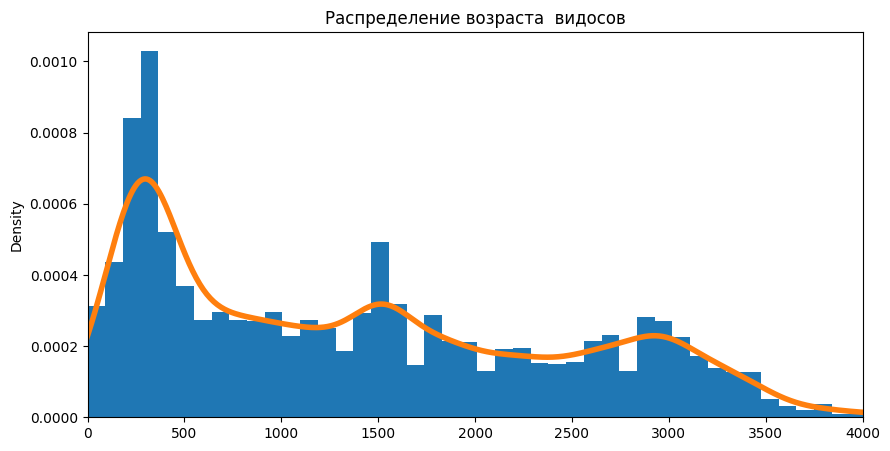

In [53]:
# можно порисовать гистограмы

plt.figure(figsize = (10,5))

df.videoAge.hist(bins=50, density=True);
df.videoAge.plot(kind='kde', linewidth=4)
plt.xlim(0, 4000)
plt.title("Распределение возраста  видосов");

Можно построить сразу много гистограмм! 

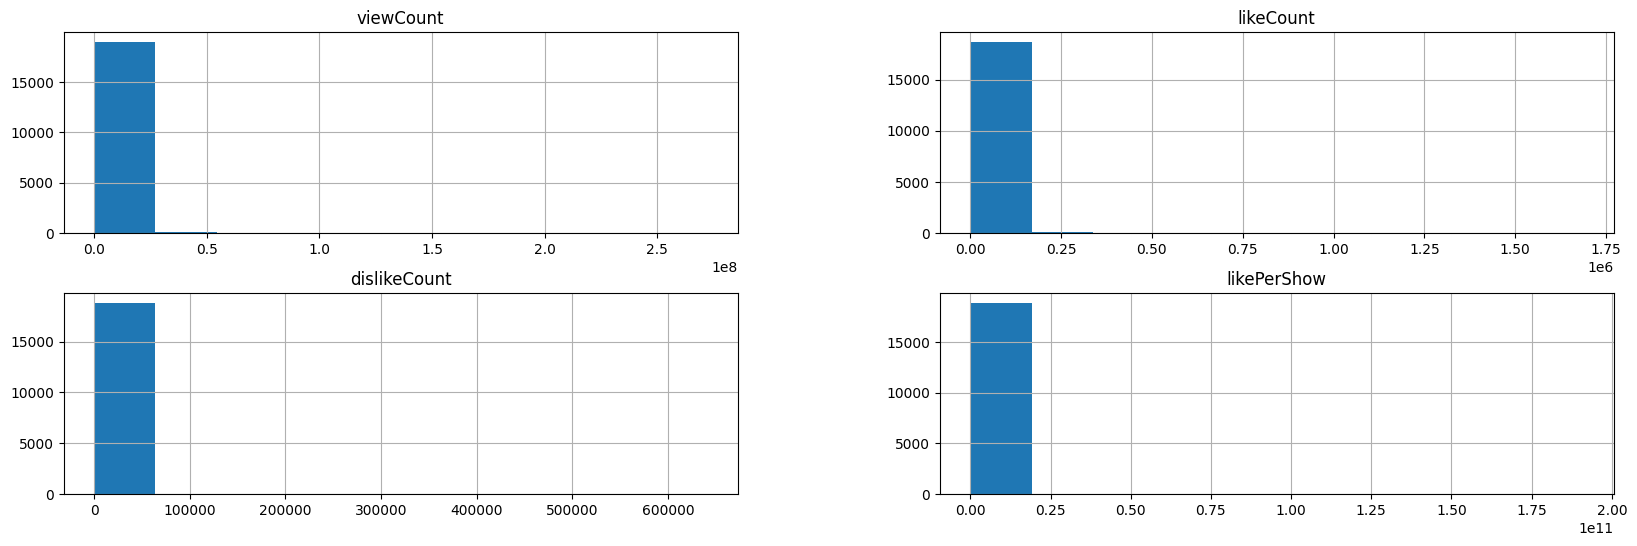

In [54]:
columns = ['viewCount', 'likeCount', 'dislikeCount', 'likePerShow']
df[columns].hist(figsize=(20, 6));

Можно построить много гистограмм для логарифмов показателей. Тогда выбросы сгладятся и будет чётче видно природу данных.

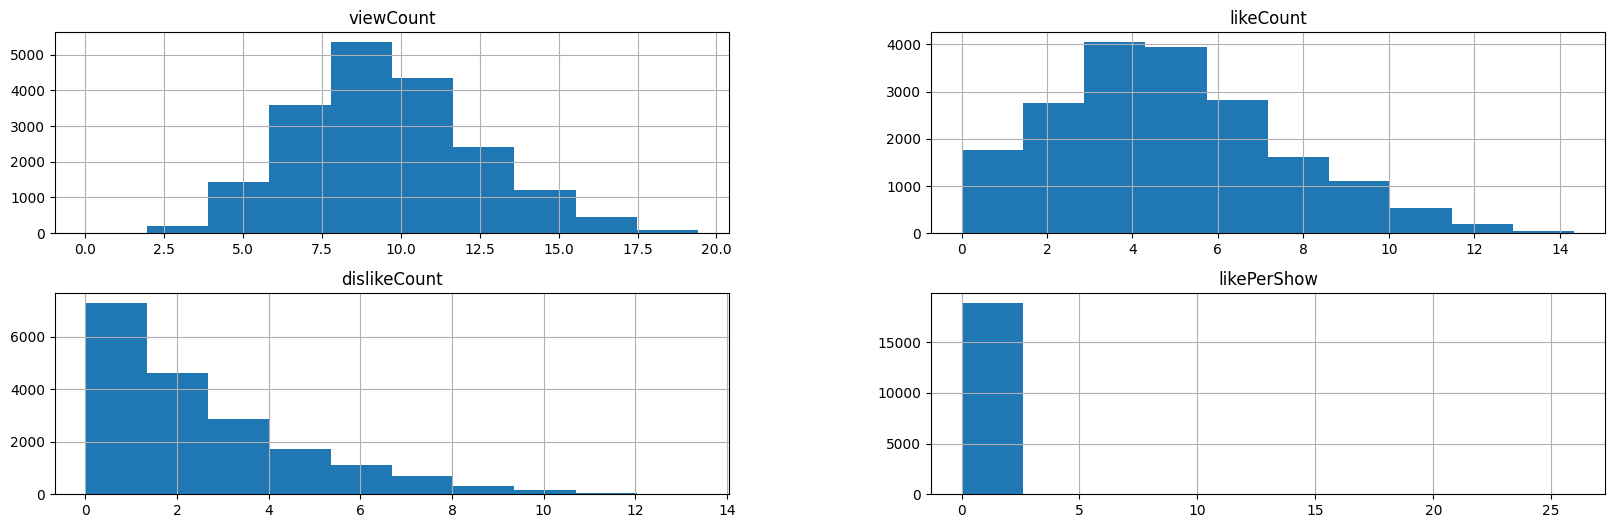

In [55]:
df[columns].apply(lambda x: np.log(x + 1)).hist(figsize=(20, 6));

## 4. Работа с пропусками 

Пропуски в данных возникают по разным причинам. Кто-то забыл измерить, записать или в принципе таких данных в природе не существовало. Когда мы будем учить алгоритмы машинного обучения, нам придётся все эти пропуски заполнять. 

Проверить клетку таблицы на пропуск помогает метод `.isnull()`

In [56]:
df.likeCount.isnull() # возвращает True, если в ячейке пропуск, иначе False

0        False
1        False
2        False
3        False
4        False
         ...  
19119    False
19120    False
19121    False
19122    False
19123    False
Name: likeCount, Length: 19124, dtype: bool

In [57]:
df.likeCount.isnull().sum()

np.int64(274)

In [58]:
df.isnull().sum()  # суммарное количество пропусков в каждом столбце

title                      0
commentCount             210
dislikeCount             274
likeCount                274
music_style                0
performer                  0
viewCount                  1
comments_obscene_cnt    6810
videoAge                   0
likePerShow              275
dtype: int64

In [59]:
# отсортировали число пропусков по убыванию
df.isnull().sum().sort_values(ascending=False)

comments_obscene_cnt    6810
likePerShow              275
dislikeCount             274
likeCount                274
commentCount             210
viewCount                  1
title                      0
music_style                0
performer                  0
videoAge                   0
dtype: int64

Метод `.fillna(что-то)` позволяет заполнить пропуски чем-нибудь нейтральным. Например, посмотрим на колонку `city`. В ней сейчас есть пропуски. Пропуски заполняют очень по-разному в зависимости от задачи. Иногда их просто выкидывают и не анализируют. Давайте заполним медианой.

In [60]:
med = df.dislikeCount.median()
med

np.float64(5.0)

In [61]:
df.dislikeCount.fillna(med, inplace=True)

C:\Users\Artvl\AppData\Local\Temp\ipykernel_15424\2426421617.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df.dislikeCount.fillna(med, inplace=True)


Ещё пропуски можно визуализировать с помощью heatmap. Желтым прокрасятся клетки, где стоял `True`, а в лиловый, где `False`.

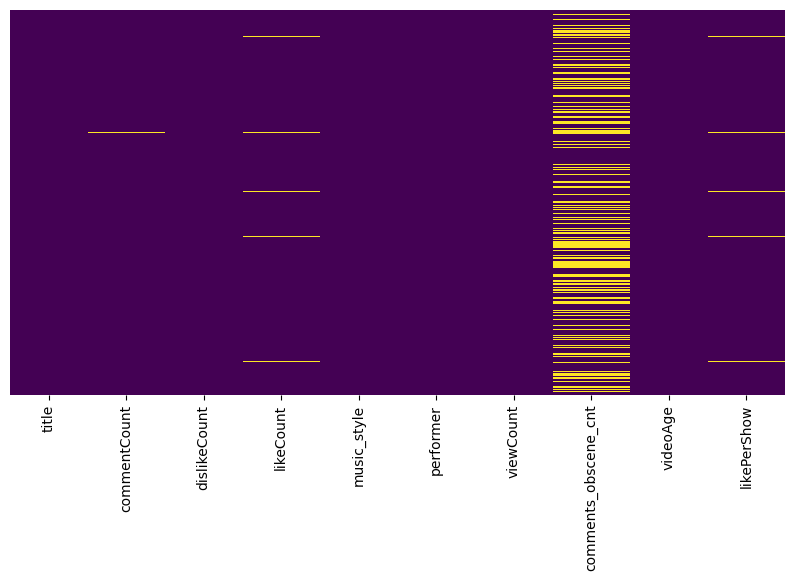

In [62]:
sns_heatmap = sns.heatmap(df.sample(5000).isnull(), 
                          yticklabels=False, 
                          cbar=False, 
                          cmap='viridis')

## 5. Группировки

Итак, мы научились с вами находить среднее в целом по всему датасету. Но что бы было, если бы нам нужно узнать среднее кол-во лайков в каждом жанре? 

Немного подумав, мы бы могли ответить на поставленный вопрос с помощью срезов: 

In [63]:
# сначала получаем, какие жанры у нас есть
df['music_style'].unique()

array(['popsa', 'rock', 'classic', 'indi', 'estrada', 'shanson', 'rap'],
      dtype=object)

In [64]:
df[df.music_style == 'popsa'].likeCount.mean()

np.float64(7492.273791654158)

In [65]:
df[df.music_style == 'rap'].likeCount.mean()

np.float64(26802.456253089473)

Однако жанров у нас в датасете достаточно много, поэтому дублировать такой код для каждого жанра может показаться совсем неоптимальным решением. 

К счастью, для таких задач и были придуманы __группировки__:

In [66]:
df.groupby('music_style')['likeCount'].mean()

music_style
classic    28663.333333
estrada      938.686662
indi        2471.842299
popsa       7492.273792
rap        26802.456253
rock        2132.887061
shanson      440.390564
Name: likeCount, dtype: float64


**Посмотрим теперь на возможности, связанные с groupby**

In [67]:
df.groupby(['music_style', 'performer'])[['likeCount', 'dislikeCount'] ].agg(['mean', 'count'])

likeCount       dislikeCount      
                                       mean count         mean count
music_style performer                                               
classic     classical_channel  28663.333333   297  1232.097315   298
estrada     агутин                39.333333     3     4.666667     3
            басков              1582.721311   122   233.270492   122
            буйнов                 2.795455    44     0.727273    44
            ваенга               133.773360   503     9.310139   503
...                                     ...   ...          ...   ...
shanson     жека                 505.681159   138    49.702899   138
            ирина_круг          1520.352381   105   185.847619   105
            михаил_круг          418.111340   485    44.055441   487
            трофимов             252.857759   232    15.478448   232
            шуфутинский          357.132565   347    16.971347   349

[111 rows x 4 columns]

In [68]:
df.groupby(['music_style', 'performer'])[['likeCount', 'dislikeCount'] ].agg({'likeCount': 'min', 
                                                                              'dislikeCount': 'max'})

likeCount  dislikeCount
music_style performer                                 
classic     classical_channel        1.0       52892.0
estrada     агутин                   1.0          14.0
            басков                   0.0       11997.0
            буйнов                   0.0          13.0
            ваенга                   1.0         580.0
...                                  ...           ...
shanson     жека                     0.0        3586.0
            ирина_круг               7.0       12906.0
            михаил_круг              0.0        3063.0
            трофимов                 0.0        1037.0
            шуфутинский              0.0        1512.0

[111 rows x 2 columns]

Кроме группировок иногда полезно строить таблицы сопряженности. 

In [69]:
df['videoAgeYears'] = df.videoAge // 365 # сколько видосику лет

In [70]:
df_pivot = df.pivot_table(
    index='videoAgeYears', columns='music_style', 
    values='likeCount', aggfunc='median'
)

df_pivot

music_style,classic,estrada,indi,popsa,rap,rock,shanson
videoAgeYears,,,,,,,
0,67.0,12.0,41.5,590.0,3872.5,51.0,5.0
1,74.0,93.5,89.0,711.0,7997.0,101.0,20.5
2,110.5,89.0,26.5,439.0,3126.0,64.5,9.0
3,339.5,56.5,11.0,215.0,4451.0,85.5,18.0
4,1084.5,11.0,14.0,74.0,1153.0,53.0,7.0
5,1198.0,131.5,2220.5,105.0,2842.0,73.5,51.0
6,4263.0,83.5,126.0,104.0,2958.5,119.0,59.5
7,6524.0,72.5,148.0,93.0,1153.0,115.0,251.0
8,10594.0,78.5,54.5,569.0,187.0,115.0,154.0


## 5. Больше графиков богу графиков

Многие картинки в matplotlib рисовать не очень удобно и приходится делать много циклов. На пример такого кода вы можете посмотреть в конце тетрадки. Для простоты был сделан специальный пакет для графики `seaborn`. В нём все картинки строятся в одну-две команды.

In [71]:
df_log = df[columns].apply(lambda x: np.log(x + 1))
df_log['music_style'] = df['music_style']
df_log.head()

,viewCount,likeCount,dislikeCount,likePerShow,music_style
0,12.275142,7.246368,3.784190,0.006521,popsa
1,14.613657,9.262268,6.538140,0.004730,popsa
2,10.604801,5.598422,2.397895,0.006648,popsa
3,9.384966,5.099866,2.079442,0.013597,popsa
4,11.423919,6.393591,2.995732,0.006505,popsa


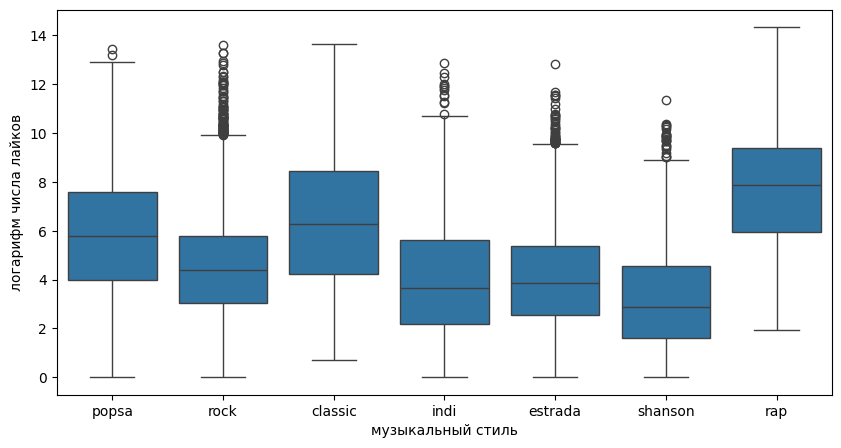

In [72]:
sns.boxplot(x='music_style', y='likeCount', data=df_log)

plt.xlabel('музыкальный стиль')
plt.ylabel('логарифм числа лайков');

Можно построить похожую картинку под названием виалончель. Она отражает то же самое, что и ящики с усами, но выглядит более красиво. 

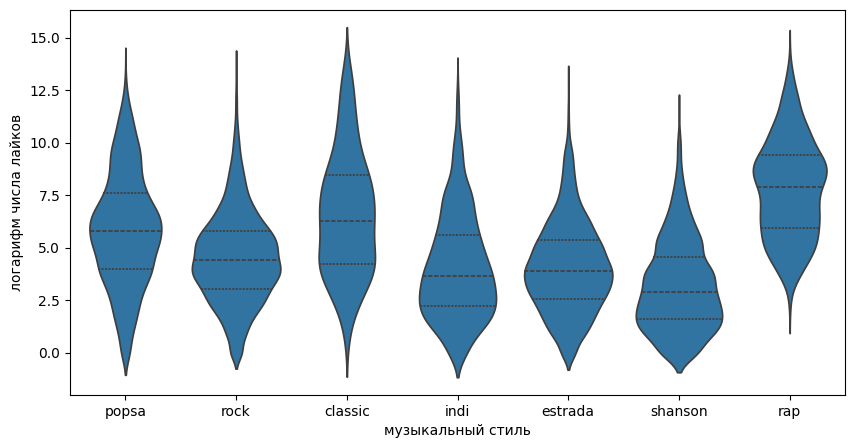

In [73]:
sns.violinplot(x='music_style', 
               y='likeCount', 
               data=df_log, 
               inner="quartile")

plt.xlabel('музыкальный стиль')
plt.ylabel('логарифм числа лайков');

Добавим дополнительное разбиение по возрасту видоса

In [74]:
df_log['isOldVideo'] = df['videoAgeYears'] >= 5

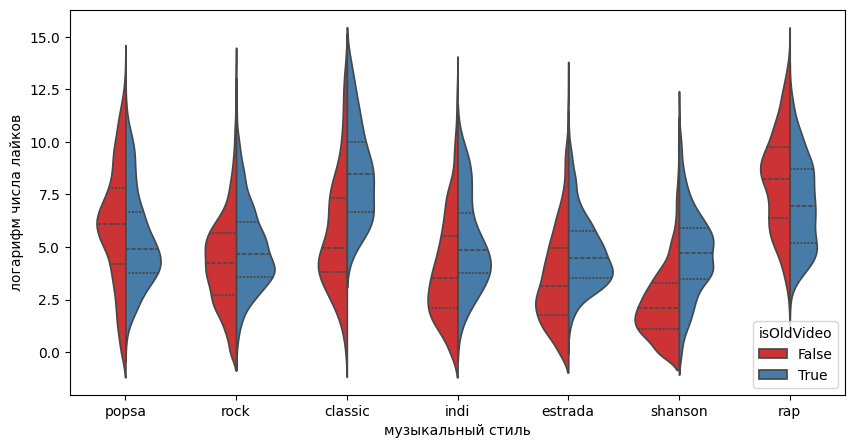

In [75]:
sns.violinplot(x='music_style', 
               y='likeCount', 
               hue='isOldVideo',
               data=df_log, 
               split=True, 
               palette='Set1', 
               inner='quartile')

plt.xlabel('музыкальный стиль')
plt.ylabel('логарифм числа лайков');

Давайте посчитаем между действительными переменными корреляции.

In [76]:
colnames = df.dtypes[df.dtypes == 'float64'].index.values
df[colnames].corr(method='pearson')

,commentCount,dislikeCount,likeCount,viewCount,comments_obscene_cnt,likePerShow
commentCount,1.000000,0.876216,0.743693,0.550143,0.396904,-0.000831
dislikeCount,0.876216,1.000000,0.602914,0.452557,0.381822,-0.000497
likeCount,0.743693,0.602914,1.000000,0.841185,0.394959,-0.000938
viewCount,0.550143,0.452557,0.841185,1.000000,0.260077,-0.001168
comments_obscene_cnt,0.396904,0.381822,0.394959,0.260077,1.000000,-0.001212
likePerShow,-0.000831,-0.000497,-0.000938,-0.001168,-0.001212,1.000000


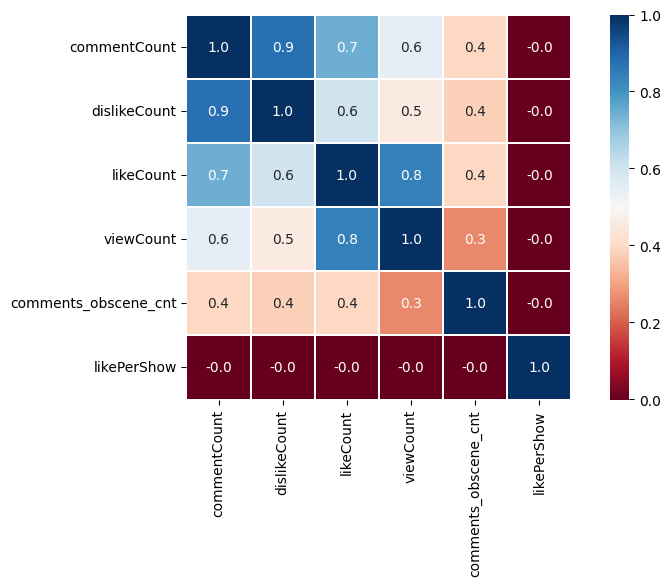

In [77]:
sns.heatmap(df[colnames].corr(method='pearson'), 
            square=True, annot=True, fmt=".1f", 
            linewidths=0.1, cmap="RdBu");

Можно построить парные облака рассеивания. 

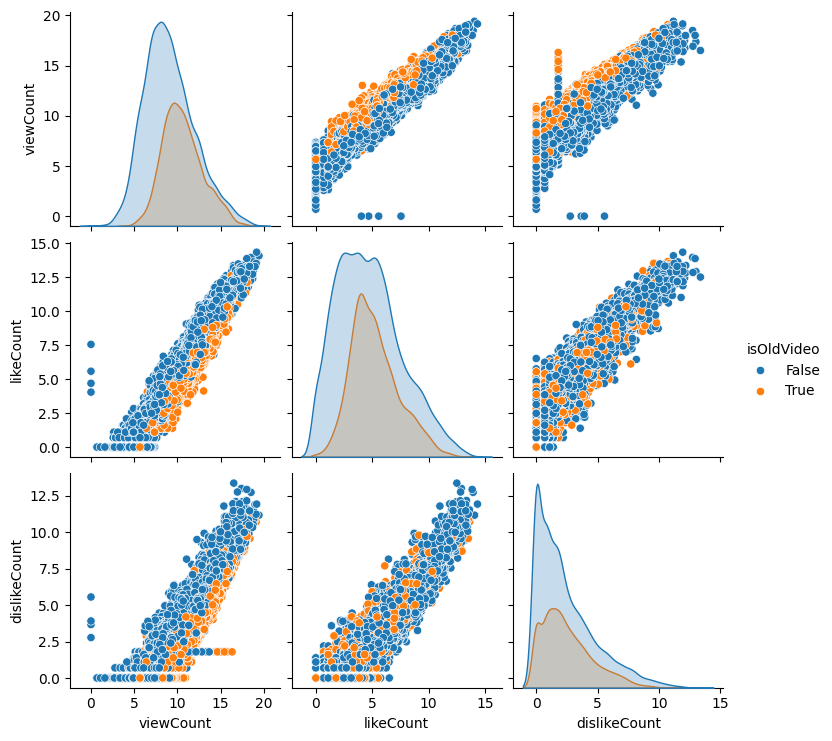

In [78]:
columns = ['viewCount', 'likeCount', 'dislikeCount', 'isOldVideo']
sns.pairplot(df_log[columns], hue='isOldVideo');

Можно построить похожие графики для конкретных переменных.

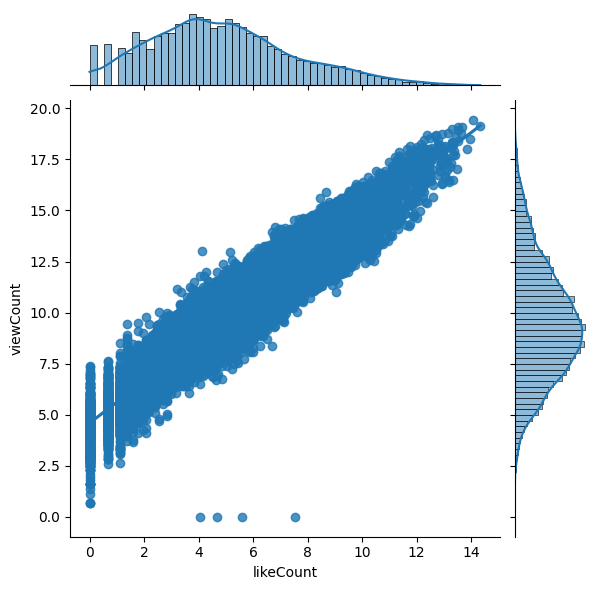

In [79]:
sns.jointplot(x="likeCount", y="viewCount", data=df_log, kind="reg");

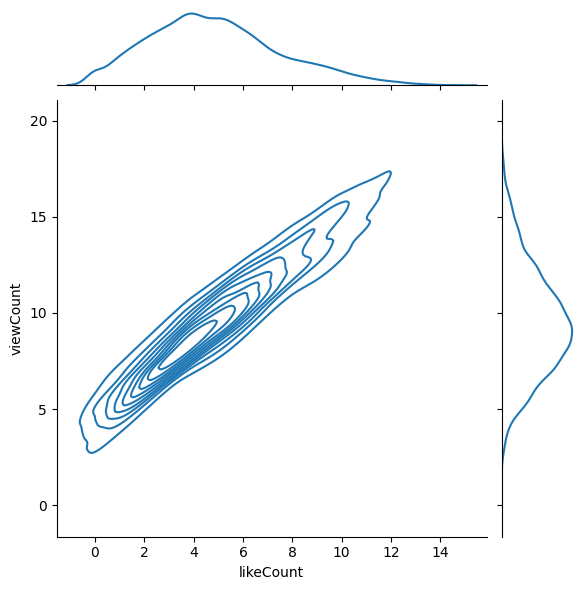

In [80]:
sns.jointplot(x="likeCount", y="viewCount", data=df_log, kind="kde");

В [документации к seaborn](https://seaborn.pydata.org/examples/index.html) есть много примеров графиков, которые вы можете украсть к себе и сделать свою тетрадку с данными красивее.

## 6. Более сложные картинки

Теперь давайте немного поработаем со сложными картинками, которые состоят из кучи более маленьких картинок. Например, я хочу, чтобы слева сверху была гистограмма с лайками под рэпчиной. Справа снизу гистограмма с лайками под всем остальным. А на побочной диагонали виалончели и ящики с усами. 

In [81]:
df_log['is_rap'] = 1*(df['music_style']  == 'rap')

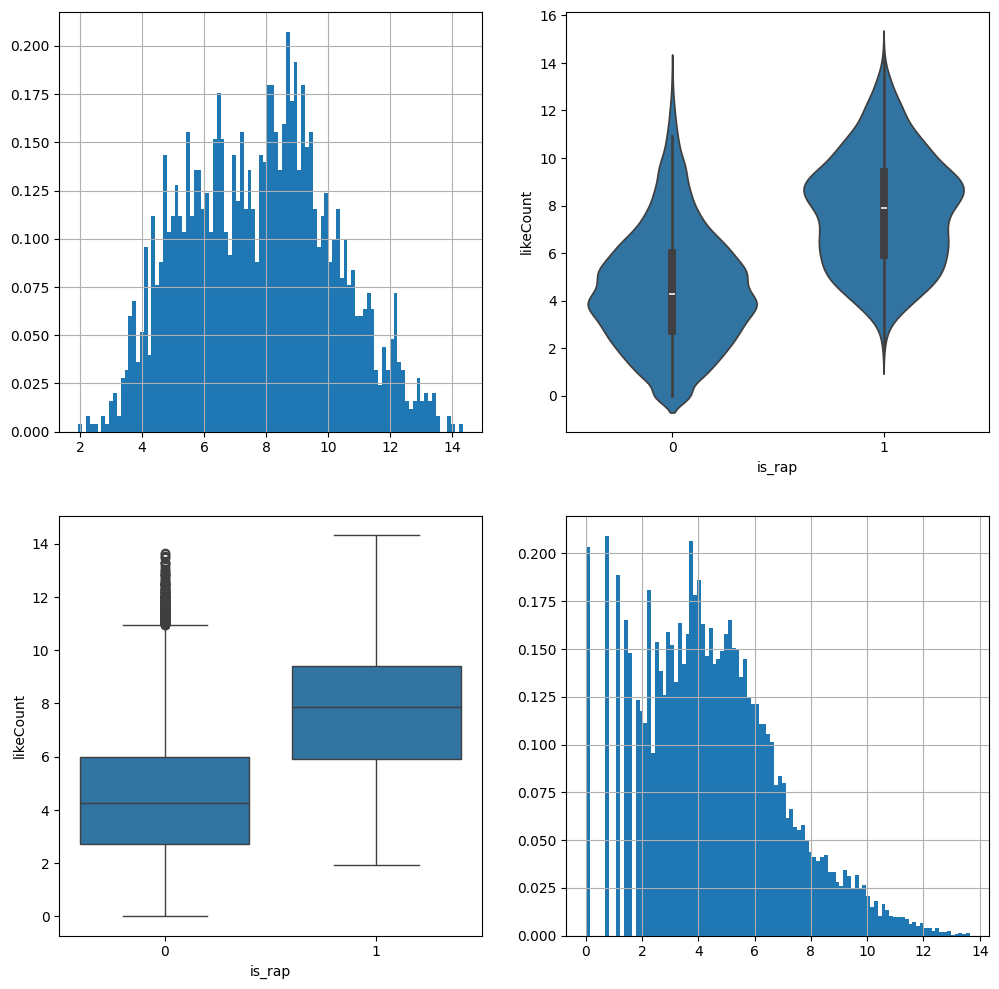

In [82]:
# Первая строчка говорит что я буду строить матрицу из картинок размера 2 x 2
_, axes = plt.subplots(2, 2, figsize=(12,12))

# дополнительной опцией ax = axes[i,j] я говорю где рисовать картинку! 
df_log['likeCount'][df_log.is_rap == 1].hist(bins=100, density=True, ax=axes[0, 0])
df_log['likeCount'][df_log.is_rap == 0].hist(bins=100, density=True, ax=axes[1, 1])

sns.boxplot(x='is_rap', y='likeCount', data=df_log, ax=axes[1, 0])
sns.violinplot(x='is_rap', y='likeCount', data=df_log, ax=axes[0, 1]);

Иногда для картинок нужно сделать предобработку данных. Построим стобиковую диаграмку для жанров, чтобы понять как они распределены. 

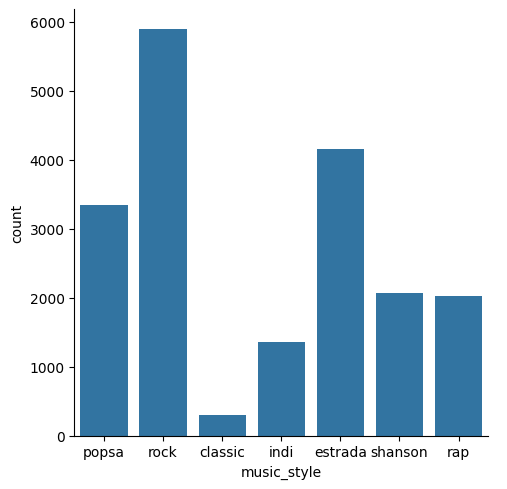

In [83]:
sns.catplot(x='music_style', data=df, kind='count');

Можно постэкать жанры между собой на одной картинке и посмотреть как их соотношение изменялось год от года.

In [84]:
df_pivot = df.pivot_table(index='videoAgeYears', columns='music_style', values='videoAge', aggfunc='count')
df_pivot

music_style,classic,estrada,indi,popsa,rap,rock,shanson
videoAgeYears,,,,,,,
0,26.0,1078.0,462.0,578.0,412.0,1351.0,670.0
1,52.0,387.0,324.0,678.0,284.0,751.0,80.0
2,34.0,244.0,164.0,490.0,305.0,532.0,96.0
3,37.0,305.0,227.0,357.0,213.0,496.0,104.0
4,56.0,486.0,103.0,277.0,181.0,688.0,393.0
5,37.0,302.0,10.0,263.0,105.0,371.0,211.0
6,34.0,188.0,25.0,223.0,104.0,345.0,239.0
7,13.0,226.0,14.0,235.0,221.0,583.0,197.0
8,4.0,622.0,28.0,147.0,104.0,495.0,35.0


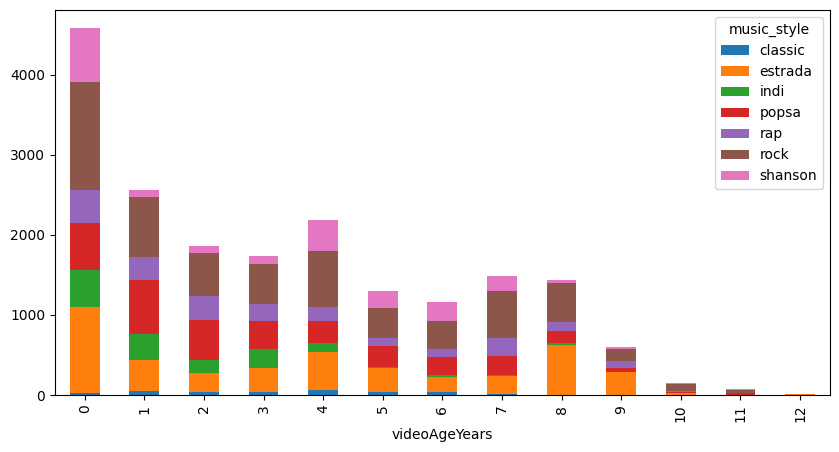

In [85]:
df_pivot.plot(kind='bar', stacked=True);

Некоторые картинки приходится строить по циклу. Давайте посмотрим как это делается, чтобы в будущем у нас не было с этим проблем. 

In [86]:
# заведем еще одну категориальную переменную 
top_performers = df.performer.value_counts().index[:20]
df['is_top_performer'] = df.performer.isin(top_performers)

In [87]:
cat_features = ['music_style', 'is_top_performer', 'videoAgeYears']

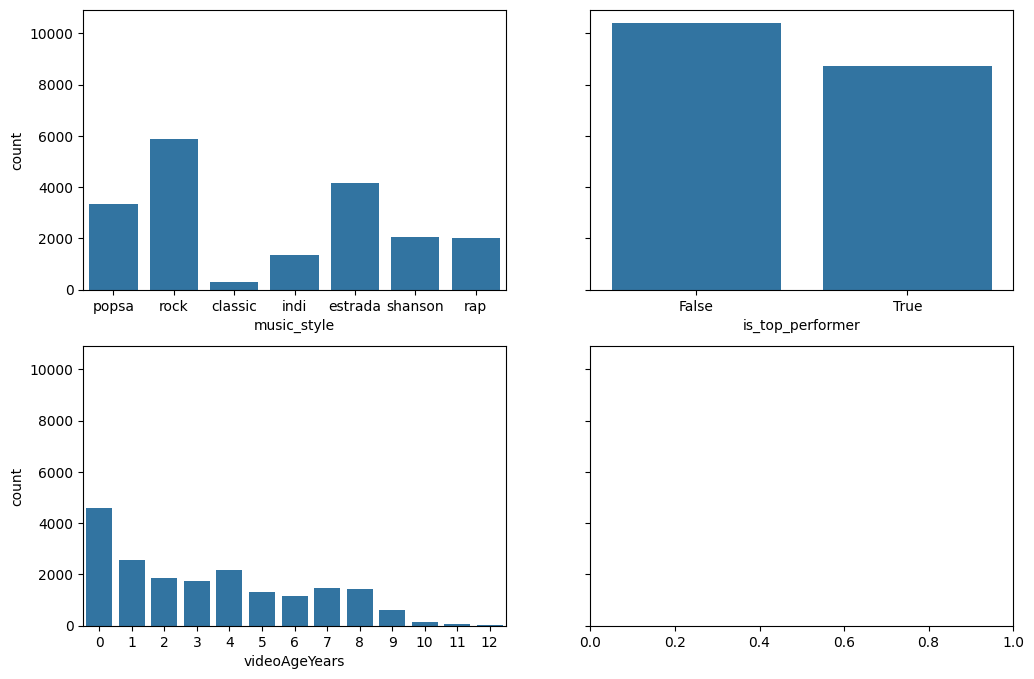

In [88]:
fig, axes = plt.subplots(2, 2, figsize=(12, 8), sharey=True)

for i in range(len(cat_features)):
    sns.countplot(x=cat_features[i], data=df, ax=axes[i // 2, i % 2])

Ещё пример! Наносим каждую точку со своим цветом в зависимости от жанра. Размер точки - как часто жанр встречается! 

In [89]:
sizes = df_log.groupby('music_style').agg('count')['dislikeCount']
sizes

music_style
classic     298
estrada    4151
indi       1359
popsa      3339
rap        2028
rock       5888
shanson    2061
Name: dislikeCount, dtype: int64

In [90]:
sizes = sizes.to_dict()
sizes

{'classic': 298,
 'estrada': 4151,
 'indi': 1359,
 'popsa': 3339,
 'rap': 2028,
 'rock': 5888,
 'shanson': 2061}

In [91]:
# При желании можно импортировать цветовую схему:  http://seaborn.pydata.org/tutorial/color_palettes.html
colors = 'bgrcmyk'

colors = dict(zip(df_log.music_style.unique(), list(colors)))
colors

{'popsa': 'b',
 'rock': 'g',
 'classic': 'r',
 'indi': 'c',
 'estrada': 'm',
 'shanson': 'y',
 'rap': 'k'}

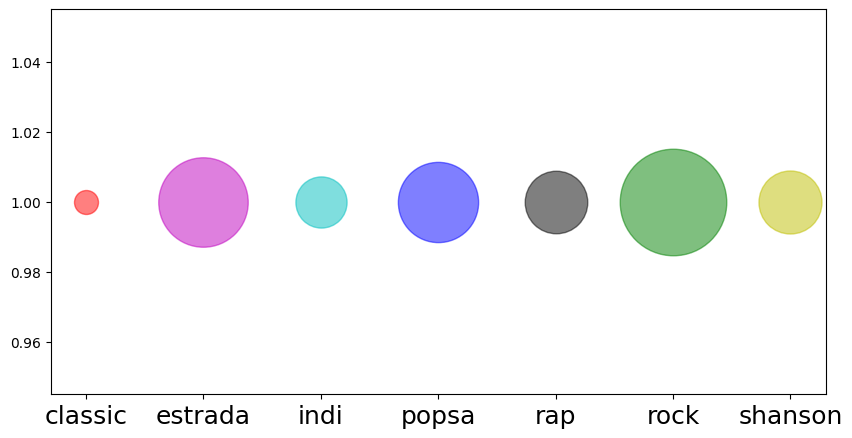

In [92]:
styles = list(sizes.keys())

for i,y in enumerate(styles):
    plt.scatter(i, 1, c=colors[y], alpha=0.5, label=str(y), s=sizes[y])
    
plt.xticks(ticks=list(range(len(styles))) , labels=styles, size=18);

Это очень странна визуализация, она тут только ради примера, чтобы вы поняли, что можно извращаться очень по-разному. 

## 7. Другие полезные приёмы

**Сброс индексов**

In [93]:
df.iloc[[10, 20, 30, 40], [0, 1]].reset_index(drop=True)

,title,commentCount
0,"""LAZERBOY""( Michael Yousher videoremix) Сергей...",5.0
1,"""Аве Мария"" Весь зал плакал. Вика 11 лет",3865.0
2,"""Большая семья"" Игоря Николаева - часть 2",3.0
3,"""Всё, что было"". Начало.",23.0


**Уникальные значения**

In [94]:
df['music_style'].value_counts()

music_style
rock       5888
estrada    4151
popsa      3339
shanson    2061
rap        2028
indi       1359
classic     298
Name: count, dtype: int64

In [95]:
df['music_style'].value_counts(normalize=True)

music_style
rock       0.307885
estrada    0.217057
popsa      0.174597
shanson    0.107770
rap        0.106045
indi       0.071063
classic    0.015583
Name: proportion, dtype: float64

In [96]:
df['music_style'].unique()

array(['popsa', 'rock', 'classic', 'indi', 'estrada', 'shanson', 'rap'],
      dtype=object)

In [97]:
df['music_style'].nunique()

7

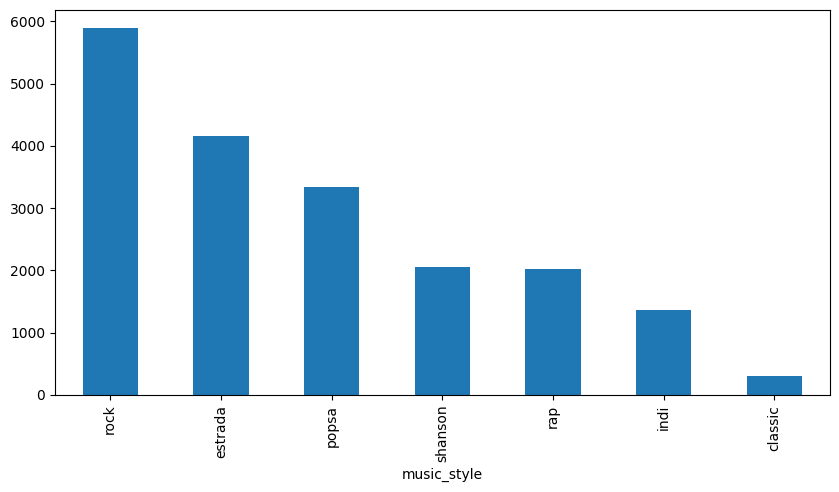

In [98]:
df['music_style'].value_counts().plot(kind='bar');

**Работа со строками**

* `.isin()` $–$ для того, чтобы оставить лишь те строки, категории которой лежат в некотором списке
* `.str` $–$ для того, чтобы использовать методы, которые есть у строк
* `.str.startswith()` $–$ для того, чтобы оставить строки, которые начинаются с определенного текста
* `.str.contains()` $–$ для того, чтобы оставить строки, содержание которых имеет определенный текст
* _и так далее, подробно методы строк изучали ранее_

In [99]:
interested_styles = ['rock', 'rap']

df['music_style'].isin(interested_styles)

0        False
1        False
2        False
3        False
4        False
         ...  
19119    False
19120    False
19121     True
19122     True
19123    False
Name: music_style, Length: 19124, dtype: bool

In [100]:
# делаем условный срез
df[df['music_style'].isin(interested_styles)].head()

,title,commentCount,dislikeCount,likeCount,music_style,performer,viewCount,comments_obscene_cnt,videoAge,likePerShow,videoAgeYears,is_top_performer
8,"""Hey Tovarish"" Video Shooting",10.0,1.0,34.0,rock,мумий_тролль,3815.0,0.0,2539,0.008912,6,True
15,"""SOS Матросу!"" - тизер фильма",10.0,4.0,68.0,rock,мумий_тролль,7632.0,0.0,1739,0.008910,4,True
36,"""ВОИН ДУМА""",4.0,0.0,49.0,rock,король_и_шут,1950.0,NaN,3819,0.025128,10,False
38,"""Виктор Цой. 50 лет"" Кукрыниксы - Печаль, Конч...",2.0,4.0,65.0,rock,кукрыниксы,9986.0,0.0,2351,0.006509,6,False
40,"""Всё, что было"". Начало.",23.0,5.0,171.0,rock,ария,11168.0,1.0,2351,0.015312,6,False


In [101]:
# вытаскиваем всех перформеров, начинающихся с буквы б
df[df['performer'].str.startswith('б')].head()

,title,commentCount,dislikeCount,likeCount,music_style,performer,viewCount,comments_obscene_cnt,videoAge,likePerShow,videoAgeYears,is_top_performer
42,"""Глаза - убийцы"". Первые впечатления",3.0,11.0,32.0,popsa,барских,6845.0,1.0,2849,0.004675,7,False
43,"""Глаза - убийцы"". Первые впечатления",4.0,13.0,7.0,popsa,барских,2657.0,1.0,2850,0.002635,7,False
44,"""Глаза - убийцы"". Первые впечатления",11.0,40.0,42.0,popsa,барских,11713.0,1.0,2850,0.003586,7,False
45,"""Глаза - убийцы"". Первые впечатления",1.0,10.0,23.0,popsa,барских,5621.0,1.0,2850,0.004092,7,False
46,"""Глаза - убийцы"". Первые впечатления",5.0,13.0,46.0,popsa,барских,7316.0,1.0,2850,0.006288,7,False


**Замена значений**

In [102]:
my_df = pd.DataFrame({'name':['Max', 'Rita', 'Sasha', 'Boris'], 'sex': ['M', 'F', 'F', 'M']})
my_df

,name,sex
0,Max,M
1,Rita,F
2,Sasha,F
3,Boris,M


In [103]:
d = {'M': True, 'F': False}

my_df['is_male'] = my_df.sex.map(d)
my_df

,name,sex,is_male
0,Max,M,True
1,Rita,F,False
2,Sasha,F,False
3,Boris,M,True


In [104]:
np.mean(my_df.is_male)

np.float64(0.5)

## 8. Популярность и ранжирование

Очень часто задача аналитику прилетает в абстрактном виде. Например, если вы работаете в youtube, вас могут попросить найти самых популярных исполнителей. Что такое популярность никто не уточнит и вам придётся додумывать это самостоятельно. 

### Задание 4: 

Составьте топ из самых популярных исполнителей. Определение популярности придумайте сами. У любой метрики, которую вы для этого придумаете будет куча слабых мест, подробно обсудите их. 

In [105]:
# ваш код и мысли

### Задание 5: 

Предположим, что вам надо отранжировать видео в ленте по статистике, которая собрана в таблице `df`. Как бы вы их отранжировали? На что бы вы обратили внимание?

In [106]:
# ваш код и мысли